In [41]:
import numpy
ms=50.0         #unit kg weight of the rocket shell
g = 9.81      # gravity in m s^{-2}
p=1.091       #average air density constant throughout flight in kg/m^3
r=0.5
A=numpy.pi*(r**2)      #maxium cross sectional area of the rocket 
ve=325.0        #exhaust speed in m/s
Cd=0.15       #drag coefficient
mp0=100.0       #initial weight of the rocket propellant in kg
mpc=20.0        # mass flow rate in kg/s
mpv=20
#set initial conditions:
v0=0.0    #start at stationary condition
h0=0.0    #launch from the ground
t0=0.0     #initial launching time
v=v0
def f(u):
    h=u[0]
    v=u[1]
    t=u[2]
    return numpy.array([v, 
                        -g+(mpv*ve)/(ms+mp)-p*v*numpy.abs(v)*A*Cd/(2*(ms+mp)), 
                        1])
T=99.0                #final time
dt=0.1                #time increment
N=int(T/dt)+1         #number of time-steps
#initialize the array containing the soluton for each time-step
u=numpy.empty((N, 3))
u[0]=numpy.array([h0, v0, t0])   #fill 1st element with initial values

def euler_step(u, f, dt):
    return u+dt*f(u)

#time loop- Euler method
for n in range(N-1):
    if (u[n-1,0]>=0):
        if(n>=50):
            mp=0
            mpv=0
        else:
            mp=100-2*n
        u[n+1]= euler_step(u[n], f, dt)
    else:
        u[n+1]=[0,0,u[n,2]+dt]
        

At time t=3.2s, what is the mass (in kg) of rocket propellant remaining in the rocket? 

In [53]:
mp=mp0-mpc*3.2
print('mass of rocket propellant remaining in the rocket(kg):', mp)

mass of rocket propellant remaining in the rocket(kg): 36.0


What is the maximum speed of the rocket in? At what time does this occur? What is the altitude at this time? 

In [42]:
v_max = max(u[:,1])
print("The max v is (m/s):", v_max)
for n in range(N-1):
    if (u[n,1] == v_max):
        h=u[n,0]
        t=n/10
        print ("the time is (s):",t)
        print ('the hight is (m):',h)
    else:
        continue

The max v is (m/s): 232.106133413
the time is (s): 5.0
the hight is (m): 523.522834292


what is the rocket 's maximum altitude during the flight? at what time does this occur? '

In [43]:
h_max = max(u[:,0])
print("The max h is (m):", h_max)
for n in range(N-1):
    if (u[n,0] ==h_max):
        t=n/10
        print ("the time is (s):",t)
   

The max h is (m): 1334.18294543
the time is (s): 15.7


At what time does the rocket impact the ground? What is the velocity of the rocket at time of impact?

In [50]:
for n in range(N-1):
    if (u[n+2,0] ==0):
        t=n/10
        v=u[n,1]
        print ("the time is (s):",t)
        print ('the velocity is (m/s):', v)
        break

the time is (s): 37.1
the velocity is (m/s): -86.0068349838


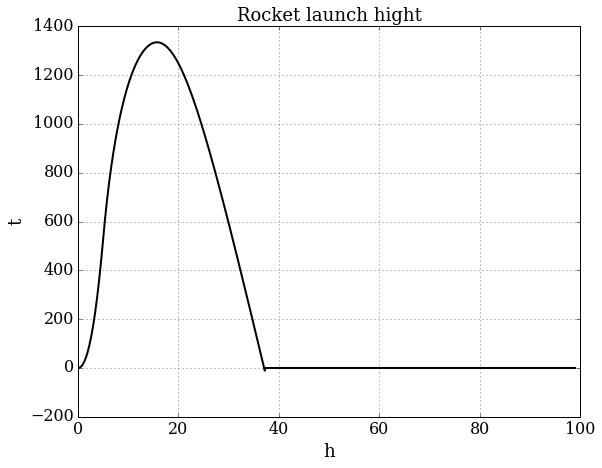

In [11]:
h=u[:,0]
v=u[:,1]
t=u[:,2]
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
pyplot.figure(figsize=(9,7))
pyplot.grid(True)
pyplot.xlabel(r'h', fontsize=18)
pyplot.ylabel(r't', fontsize=18)
pyplot.title('Rocket launch hight', fontsize=18 )
pyplot.plot(t,h, 'k-', lw=2)

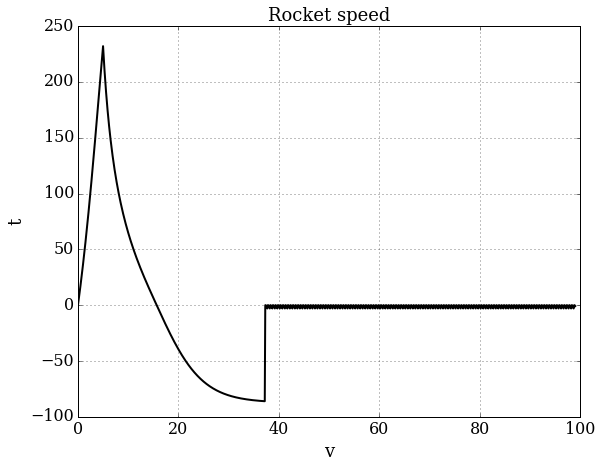

In [12]:
pyplot.figure(figsize=(9,7))
pyplot.grid(True)
pyplot.xlabel(r'v', fontsize=18)
pyplot.ylabel(r't', fontsize=18)
pyplot.title('Rocket speed', fontsize=18 )
pyplot.plot(t,v, 'k-', lw=2)